## 필요한 라이브러리 불러오기

In [21]:
import os
import warnings
warnings.simplefilter(action="ignore")

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 데이터 불러오기

In [22]:
diabetes = pd.read_csv("C:/Users/joyja/Desktop/diabetes.csv")

In [23]:
diabetes

,age,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


- age: 나이
- bmi: Body mass index
- bp: Average blood pressure
- s1 : tc, T-Cells (a type of white blood cells)
- s2 : ldl, low-density lipoproteins
- s3 : hdl, high-density lipoproteins
- s4 : tch, thyroid stimulating hormone
- s5 : ltg, lamotrigine
- s6 : glu, blood sugar level
- target : 당뇨병 진행 상태를 나타내는 값

## 1) 데이터전처리

#### 1-1) target을 y, 나머지를 x로 분할하여라

In [24]:
y = diabetes['target']

In [25]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [26]:
X = diabetes.drop(['target'], axis = 1)

In [27]:
X

,age,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...
437,0.041708,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled, columns=X.columns)
X

,age,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568
...,...,...,...,...,...,...,...,...,...
437,0.876870,0.413360,1.256040,-0.119769,-0.053957,-0.602843,-0.054499,0.655787,0.151508
438,-0.115937,-0.334410,-1.422086,1.037341,1.664355,-0.602843,0.721302,-0.380819,0.935254
439,0.876870,-0.334410,0.363573,-0.785107,-0.290965,-0.525441,-0.232934,-0.985649,0.325674
440,-0.956004,0.821235,0.025550,0.343075,0.321306,-0.602843,0.558384,0.936163,-0.545154


## 2) 다중공선성 확인

#### 2-1) heatmap과 pairplot, VIF 값을 출력해서 변수간의 다중공선성 확인하고 다중공선성이 높은 변수에 대해 서술하고 분석하여라.

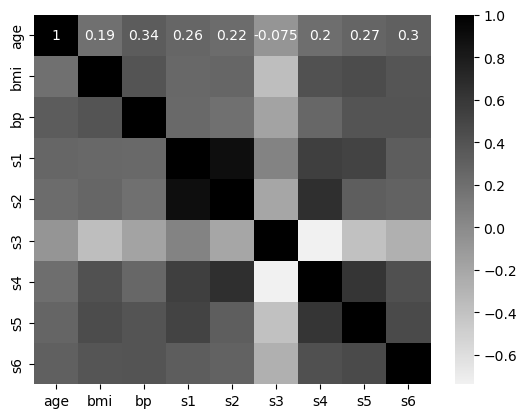

In [30]:
cmap = sns.light_palette(color="black", as_cmap=True)
sns.heatmap(X.corr(), annot=True, cmap=cmap)
plt.show()

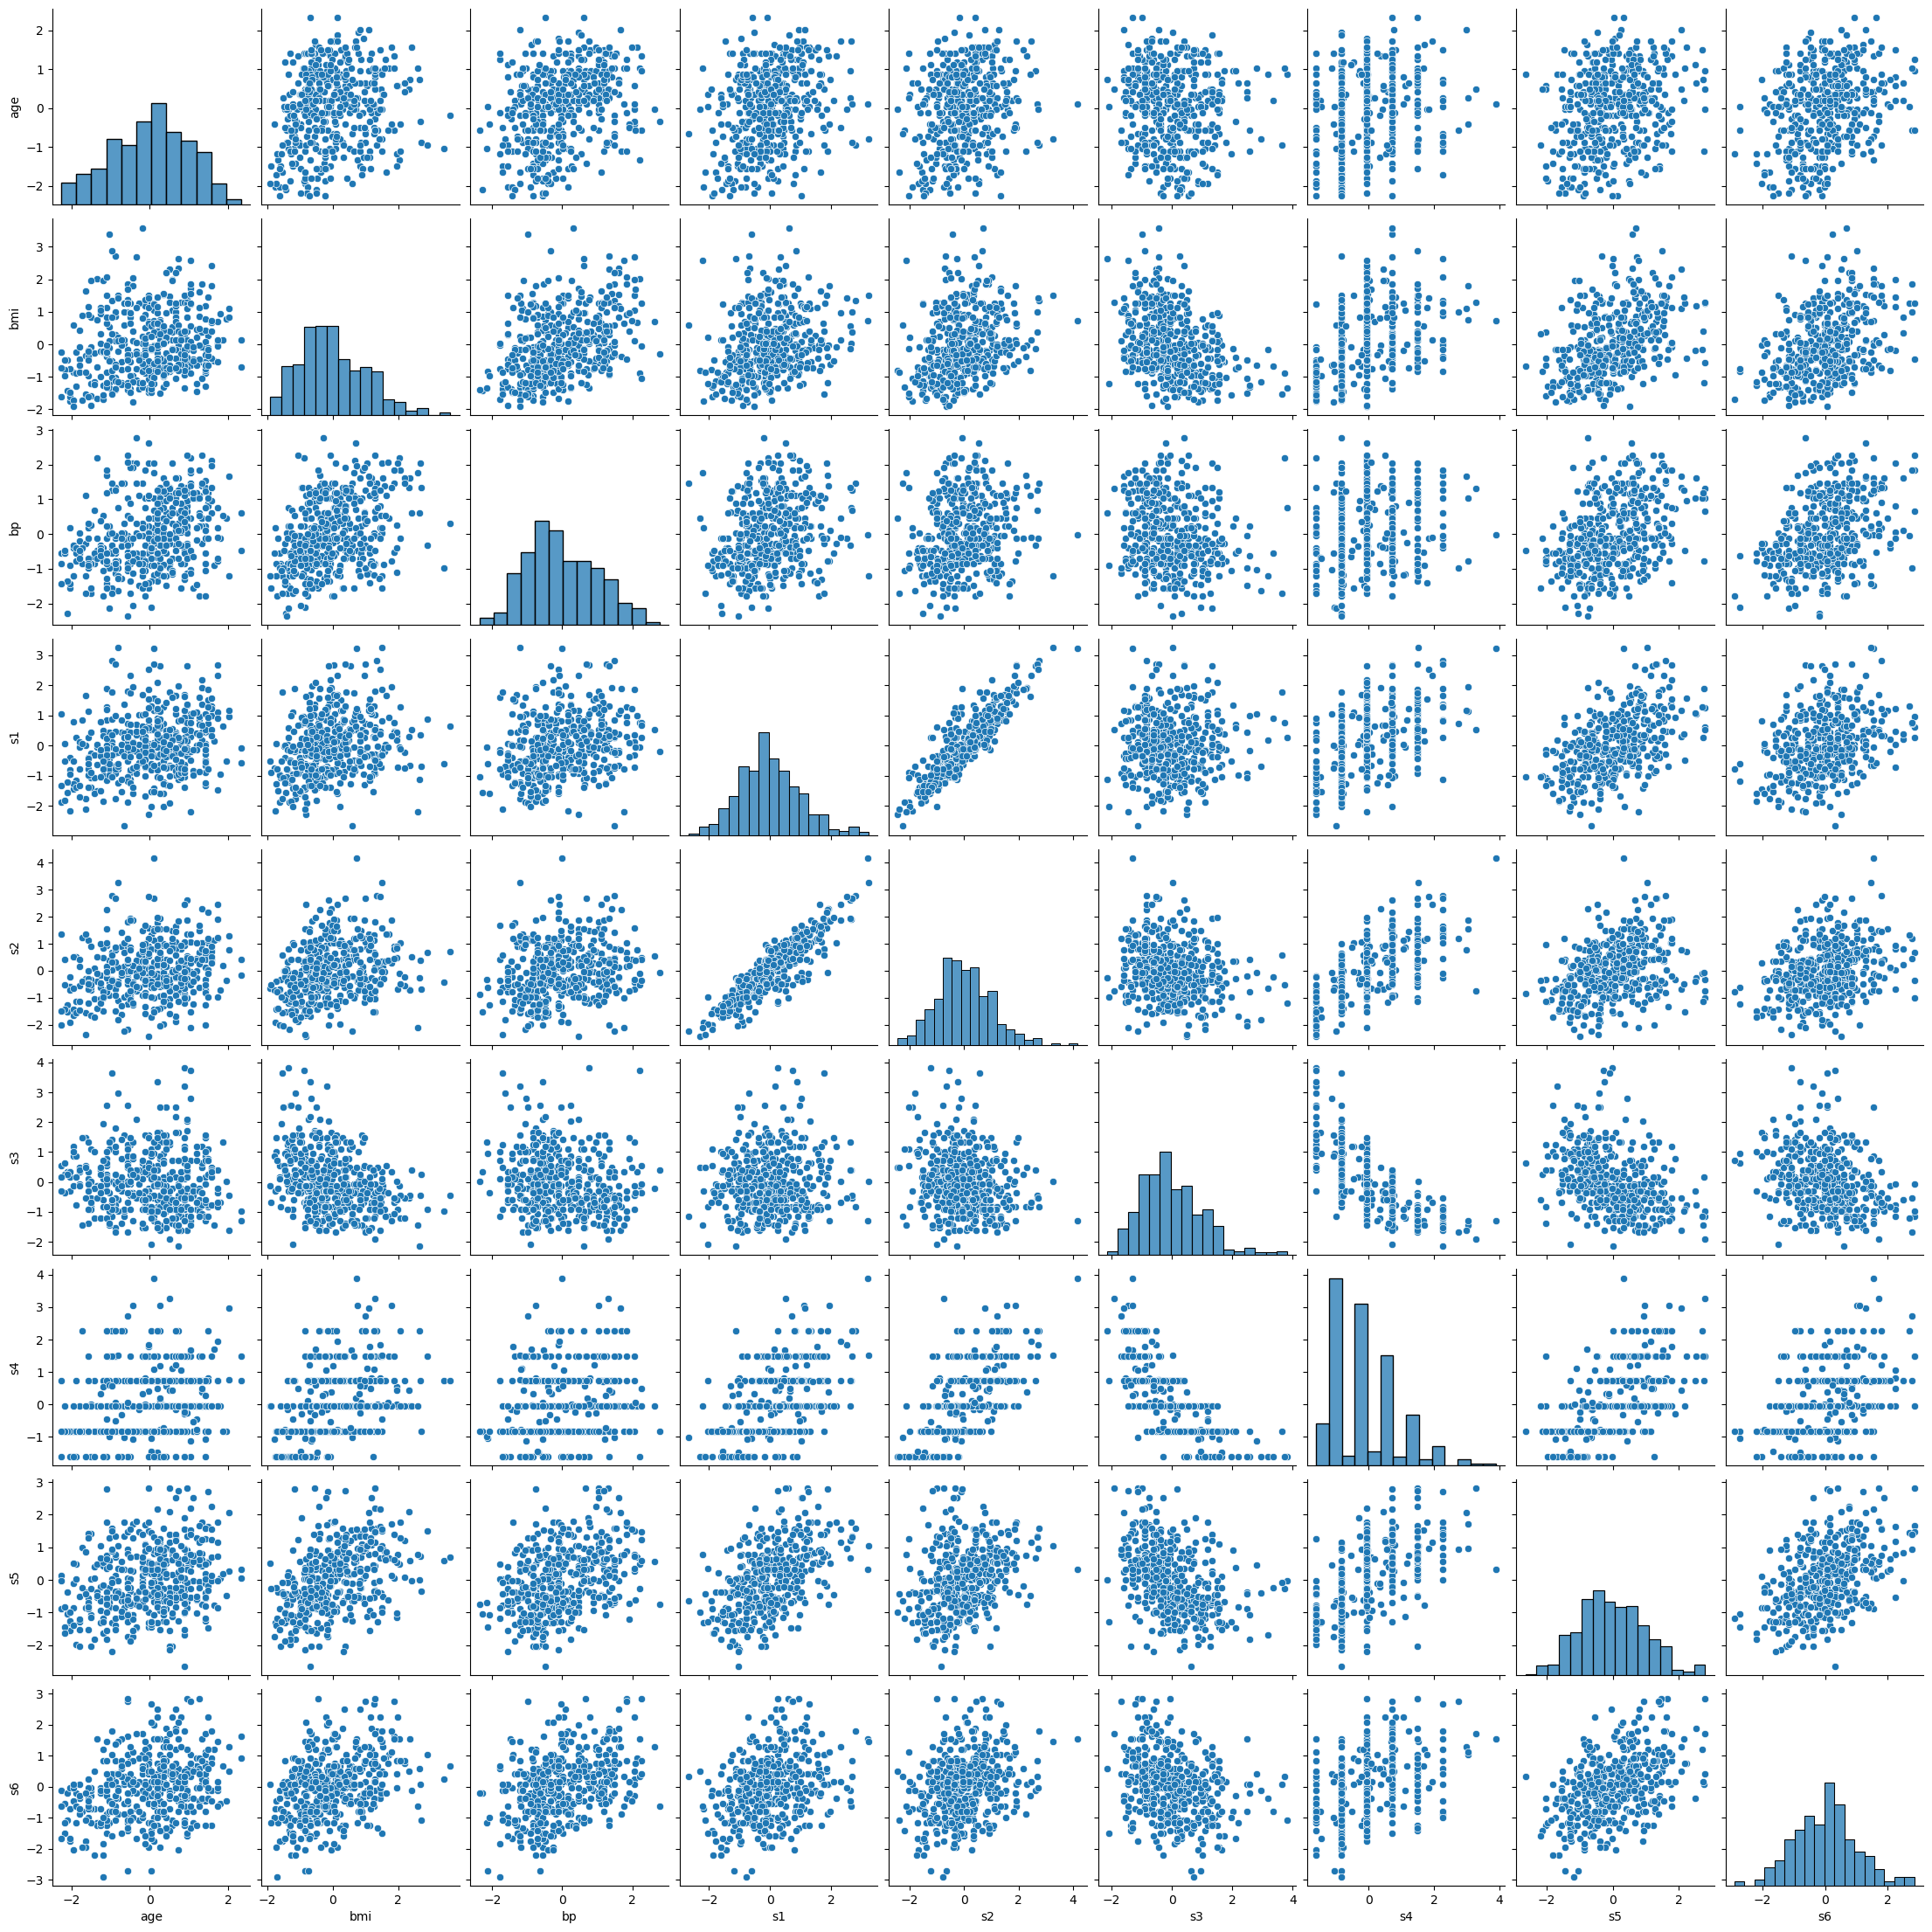

In [31]:
sns.pairplot(X)
plt.show()

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
        
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,59.062508,s1
1,39.123245,s2
2,15.369272,s3
3,10.075391,s5
4,8.833675,s4
5,1.478660,bmi
6,1.476845,s6
7,1.407578,bp
8,1.205380,age


## 3) Linear Regression

- 각 모델링에 대한 분석 결과는 자유롭게 작성하여라.
- 각 모델에는 상수항 추가, fit, summary, mse 계산을 필수로 포함시켜라.

#### 3-1) 모든 변수를 통해서 모델링하여라. 

In [45]:
X1 = X

In [46]:
X_1 = sm.add_constant(X1)
lin_model_1 = sm.OLS(y, X_1)
lin_model_1 = lin_model_1.fit()

In [47]:
lin_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     48.11
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           8.80e-60
Time:                        16:58:07   Log-Likelihood:                -2393.7
No. Observations:                 442   AIC:                             4807.
Df Residuals:                     432   BIC:                             4848.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.618     58.105      0.000     146.987     157.280
age           -1.5780      2.875     -0.549      0.583      -7.228       4.072
bmi           26.4967      3.184      8.322      0.000      20.239      32.754
bp            13.1319      3.106      4.227      0.000       7.026      19.237
s1           -33.9046     20.122     -1.685      0.093     -73.454       5.644
s2            20.0042     16.377      1.221      0.223     -12.184      52.193
s3             6.6359     10.265      0.646      0.518     -13.539      26.811
s4             6.0065      7.782      0.772      0.441      -9.289      21.302
s5            35.9767      8.311      4.329      0.000      19.642      52.311
s6             2.3268      3.182      0.731      0.465      -3.927       8.581
==============================================================================
Omnibus:                        5.601   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                4.046
Skew:                           0.094   Prob(JB):                        0.132
Kurtosis:                       2.571   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
residuals = lin_model_1.resid

mse = np.mean(residuals**2)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2961.5033766486804


#### 3-2) 통계적으로 유의하지 않은 변수를 자유롭게 제거하고 모델링하여라.

In [49]:
# age: p-value of 0.583
# age만 뺴기

X2 = X.drop(['age'],axis=1)
X2

,bmi,bp,s1,s2,s3,s4,s5,s6
0,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568
...,...,...,...,...,...,...,...,...
437,0.413360,1.256040,-0.119769,-0.053957,-0.602843,-0.054499,0.655787,0.151508
438,-0.334410,-1.422086,1.037341,1.664355,-0.602843,0.721302,-0.380819,0.935254
439,-0.334410,0.363573,-0.785107,-0.290965,-0.525441,-0.232934,-0.985649,0.325674
440,0.821235,0.025550,0.343075,0.321306,-0.602843,0.558384,0.936163,-0.545154


In [50]:
X_2 = sm.add_constant(X2)
lin_model_2 = sm.OLS(y, X_2)
lin_model_2 = lin_model_2.fit()

In [51]:
lin_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     54.18
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           1.34e-60
Time:                        16:58:09   Log-Likelihood:                -2393.9
No. Observations:                 442   AIC:                             4806.
Df Residuals:                     433   BIC:                             4843.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.616     58.152      0.000     146.992     157.275
bmi           26.5321      3.181      8.342      0.000      20.281      32.783
bp            12.7675      3.032      4.211      0.000       6.808      18.727
s1           -33.6462     20.100     -1.674      0.095     -73.152       5.860
s2            19.5894     16.346      1.198      0.231     -12.538      51.717
s3             6.4506     10.251      0.629      0.529     -13.697      26.598
s4             6.0350      7.775      0.776      0.438      -9.247      21.317
s5            35.6979      8.289      4.307      0.000      19.407      51.989
s6             2.0825      3.148      0.662      0.509      -4.105       8.270
==============================================================================
Omnibus:                        5.897   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                4.277
Skew:                           0.106   Prob(JB):                        0.118
Kurtosis:                       2.567   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
residuals=lin_model_2.resid

mse = np.mean(residuals**2)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2963.5693108336877


In [53]:
#s3: p-value = 0.518
#s3만 빼기

X3 = X.drop(['s3'],axis=1)
X3

,age,bmi,bp,s1,s2,s4,s5,s6
0,0.800500,1.297088,0.459841,-0.929746,-0.732065,-0.054499,0.418531,-0.370989
1,-0.039567,-1.082180,-0.553505,-0.177624,-0.402886,-0.830301,-1.436589,-1.938479
2,1.793307,0.934533,-0.119214,-0.958674,-0.718897,-0.054499,0.060156,-0.545154
3,-1.872441,-0.243771,-0.770650,0.256292,0.525397,0.721302,0.476983,-0.196823
4,0.113172,-0.764944,0.459841,0.082726,0.327890,-0.054499,-0.672502,-0.980568
...,...,...,...,...,...,...,...,...
437,0.876870,0.413360,1.256040,-0.119769,-0.053957,-0.054499,0.655787,0.151508
438,-0.115937,-0.334410,-1.422086,1.037341,1.664355,0.721302,-0.380819,0.935254
439,0.876870,-0.334410,0.363573,-0.785107,-0.290965,-0.232934,-0.985649,0.325674
440,-0.956004,0.821235,0.025550,0.343075,0.321306,0.558384,0.936163,-0.545154


In [54]:
X_3 = sm.add_constant(X3)
lin_model_3 = sm.OLS(y, X_3)
lin_model_3 = lin_model_3.fit()

In [55]:
lin_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     54.15
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           1.42e-60
Time:                        16:58:10   Log-Likelihood:                -2393.9
No. Observations:                 442   AIC:                             4806.
Df Residuals:                     433   BIC:                             4843.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.617     58.144      0.000     146.991     157.276
age           -1.5169      2.871     -0.528      0.598      -7.160       4.126
bmi           26.4360      3.180      8.312      0.000      20.185      32.687
bp            13.0464      3.101      4.207      0.000       6.951      19.142
s1           -22.5288      9.753     -2.310      0.021     -41.699      -3.359
s2            11.9471     10.617      1.125      0.261      -8.921      32.815
s4             2.6446      5.785      0.457      0.648      -8.726      14.015
s5            32.1318      5.801      5.539      0.000      20.730      43.534
s6             2.3745      3.179      0.747      0.455      -3.873       8.622
==============================================================================
Omnibus:                        5.814   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                4.174
Skew:                           0.097   Prob(JB):                        0.124
Kurtosis:                       2.566   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
residuals=lin_model_3.resid

mse = np.mean(residuals**2)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2964.3684784719285


In [57]:
#age, s3 둘 다 제거
X4 = X.drop(['age','s3'],axis=1)
X4

,bmi,bp,s1,s2,s4,s5,s6
0,1.297088,0.459841,-0.929746,-0.732065,-0.054499,0.418531,-0.370989
1,-1.082180,-0.553505,-0.177624,-0.402886,-0.830301,-1.436589,-1.938479
2,0.934533,-0.119214,-0.958674,-0.718897,-0.054499,0.060156,-0.545154
3,-0.243771,-0.770650,0.256292,0.525397,0.721302,0.476983,-0.196823
4,-0.764944,0.459841,0.082726,0.327890,-0.054499,-0.672502,-0.980568
...,...,...,...,...,...,...,...
437,0.413360,1.256040,-0.119769,-0.053957,-0.054499,0.655787,0.151508
438,-0.334410,-1.422086,1.037341,1.664355,0.721302,-0.380819,0.935254
439,-0.334410,0.363573,-0.785107,-0.290965,-0.232934,-0.985649,0.325674
440,0.821235,0.025550,0.343075,0.321306,0.558384,0.936163,-0.545154


In [58]:
X_4 = sm.add_constant(X4)
lin_model_4 = sm.OLS(y, X_4)
lin_model_4 = lin_model_4.fit()

In [59]:
lin_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     61.94
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           1.99e-61
Time:                        16:58:11   Log-Likelihood:                -2394.1
No. Observations:                 442   AIC:                             4804.
Df Residuals:                     434   BIC:                             4837.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.614     58.192      0.000     146.995     157.272
bmi           26.4717      3.177      8.332      0.000      20.228      32.716
bp            12.6980      3.028      4.193      0.000       6.747      18.649
s1           -22.5858      9.745     -2.318      0.021     -41.739      -3.433
s2            11.7645     10.603      1.110      0.268      -9.075      32.604
s4             2.7623      5.776      0.478      0.633      -8.590      14.115
s5            31.9668      5.788      5.523      0.000      20.591      43.343
s6             2.1381      3.145      0.680      0.497      -4.042       8.319
==============================================================================
Omnibus:                        6.091   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                4.392
Skew:                           0.108   Prob(JB):                        0.111
Kurtosis:                       2.562   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
residuals=lin_model_4.resid

# MSE 계산
mse = np.mean(residuals**2)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2966.279585668836


In [61]:
#age, s3, s4 제거
X5 = X.drop(['age','s3','s4'],axis=1)
X5

,bmi,bp,s1,s2,s5,s6
0,1.297088,0.459841,-0.929746,-0.732065,0.418531,-0.370989
1,-1.082180,-0.553505,-0.177624,-0.402886,-1.436589,-1.938479
2,0.934533,-0.119214,-0.958674,-0.718897,0.060156,-0.545154
3,-0.243771,-0.770650,0.256292,0.525397,0.476983,-0.196823
4,-0.764944,0.459841,0.082726,0.327890,-0.672502,-0.980568
...,...,...,...,...,...,...
437,0.413360,1.256040,-0.119769,-0.053957,0.655787,0.151508
438,-0.334410,-1.422086,1.037341,1.664355,-0.380819,0.935254
439,-0.334410,0.363573,-0.785107,-0.290965,-0.985649,0.325674
440,0.821235,0.025550,0.343075,0.321306,0.936163,-0.545154


In [62]:
X_5 = sm.add_constant(X5)
lin_model_5 = sm.OLS(y, X_5)
lin_model_5 = lin_model_5.fit()

In [63]:
lin_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     72.36
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           2.51e-62
Time:                        16:58:13   Log-Likelihood:                -2394.2
No. Observations:                 442   AIC:                             4802.
Df Residuals:                     435   BIC:                             4831.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.612     58.244      0.000     147.000     157.267
bmi           26.4418      3.174      8.332      0.000      20.205      32.679
bp            12.5885      3.017      4.173      0.000       6.659      18.518
s1           -25.6834      7.274     -3.531      0.000     -39.980     -11.387
s2            15.7057      6.665      2.357      0.019       2.606      28.805
s5            34.0174      3.884      8.758      0.000      26.383      41.652
s6             2.2557      3.132      0.720      0.472      -3.900       8.412
==============================================================================
Omnibus:                        5.899   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                4.244
Skew:                           0.101   Prob(JB):                        0.120
Kurtosis:                       2.565   Cond. No.                         6.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
residuals=lin_model_5.resid

mse = np.mean(residuals**2)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2967.842744881837


In [65]:
#age, s3, s4, s6 제거
X6 = X.drop(['age','s3','s4', 's6'],axis=1)
X6

,bmi,bp,s1,s2,s5
0,1.297088,0.459841,-0.929746,-0.732065,0.418531
1,-1.082180,-0.553505,-0.177624,-0.402886,-1.436589
2,0.934533,-0.119214,-0.958674,-0.718897,0.060156
3,-0.243771,-0.770650,0.256292,0.525397,0.476983
4,-0.764944,0.459841,0.082726,0.327890,-0.672502
...,...,...,...,...,...
437,0.413360,1.256040,-0.119769,-0.053957,0.655787
438,-0.334410,-1.422086,1.037341,1.664355,-0.380819
439,-0.334410,0.363573,-0.785107,-0.290965,-0.985649
440,0.821235,0.025550,0.343075,0.321306,0.936163


In [66]:
X_6 = sm.add_constant(X6)
lin_model_6 = sm.OLS(y, X_6)
lin_model_6 = lin_model_6.fit()

In [67]:
lin_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     86.82
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           3.30e-63
Time:                        16:58:13   Log-Likelihood:                -2394.5
No. Observations:                 442   AIC:                             4801.
Df Residuals:                     436   BIC:                             4825.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.611     58.276      0.000     147.003     157.264
bmi           26.7596      3.141      8.520      0.000      20.586      32.933
bp            13.0363      2.950      4.419      0.000       7.238      18.835
s1           -25.9686      7.259     -3.577      0.000     -40.236     -11.701
s2            16.2242      6.622      2.450      0.015       3.209      29.240
s5            34.7295      3.754      9.251      0.000      27.351      42.108
==============================================================================
Omnibus:                        5.303   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                3.964
Skew:                           0.104   Prob(JB):                        0.138
Kurtosis:                       2.585   Cond. No.                         6.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
residuals = lin_model_6.resid

# MSE 계산
mse = np.mean(residuals**2)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2971.3811528998367


#### 3-3) 위에서 분석했던 다중공선성을 반영하여 변수를 선택하고 모델링하여라.

In [69]:
# s1, s2 drop
X7 = X.drop(['s1','s2'],axis=1)
X7

,age,bmi,bp,s3,s4,s5,s6
0,0.800500,1.297088,0.459841,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-1.082180,-0.553505,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,0.934533,-0.119214,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.243771,-0.770650,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.764944,0.459841,0.171178,-0.054499,-0.672502,-0.980568
...,...,...,...,...,...,...,...
437,0.876870,0.413360,1.256040,-0.602843,-0.054499,0.655787,0.151508
438,-0.115937,-0.334410,-1.422086,-0.602843,0.721302,-0.380819,0.935254
439,0.876870,-0.334410,0.363573,-0.525441,-0.232934,-0.985649,0.325674
440,-0.956004,0.821235,0.025550,-0.602843,0.558384,0.936163,-0.545154


In [70]:
X_7= sm.add_constant(X7)
lin_model_7 = sm.OLS(y, X_7)
lin_model_7 = lin_model_7.fit()

In [71]:
lin_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     60.73
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           1.64e-60
Time:                        16:58:15   Log-Likelihood:                -2396.3
No. Observations:                 442   AIC:                             4809.
Df Residuals:                     434   BIC:                             4841.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.627     57.907      0.000     146.970     157.297
age           -1.8274      2.873     -0.636      0.525      -7.474       3.819
bmi           26.3438      3.171      8.308      0.000      20.112      32.576
bp            12.7866      3.113      4.108      0.000       6.669      18.905
s3           -12.8806      3.981     -3.236      0.001     -20.705      -5.057
s4            -6.7601      4.649     -1.454      0.147     -15.897       2.377
s5            25.2424      3.671      6.877      0.000      18.028      32.457
s6             2.3389      3.192      0.733      0.464      -3.935       8.613
==============================================================================
Omnibus:                        7.208   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                4.921
Skew:                           0.108   Prob(JB):                       0.0854
Kurtosis:                       2.531   Cond. No.                         3.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
residuals=lin_model_7.resid

mse = np.mean(residuals**2)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2995.5775809071183


In [73]:
# multicolinearity check

from statsmodels.stats.outliers_influence import variance_inflation_factor
        
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X7.values, i) for i in range(X7.shape[1])]
vif["features"] = X7.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,3.131115,s4
1,2.295807,s3
2,1.952007,s5
3,1.476141,s6
4,1.456611,bmi
5,1.403805,bp
6,1.195718,age


In [107]:
# s1 drop
X11 = X.drop(['s1'],axis=1)
X11

,age,bmi,bp,s2,s3,s4,s5,s6
0,0.800500,1.297088,0.459841,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-1.082180,-0.553505,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,0.934533,-0.119214,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.243771,-0.770650,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.764944,0.459841,0.327890,0.171178,-0.054499,-0.672502,-0.980568
...,...,...,...,...,...,...,...,...
437,0.876870,0.413360,1.256040,-0.053957,-0.602843,-0.054499,0.655787,0.151508
438,-0.115937,-0.334410,-1.422086,1.664355,-0.602843,0.721302,-0.380819,0.935254
439,0.876870,-0.334410,0.363573,-0.290965,-0.525441,-0.232934,-0.985649,0.325674
440,-0.956004,0.821235,0.025550,0.321306,-0.602843,0.558384,0.936163,-0.545154


In [110]:
X_11= sm.add_constant(X11)
lin_model_11 = sm.OLS(y, X_11)
lin_model_11 = lin_model_11.fit()

In [111]:
lin_model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     53.54
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           4.68e-60
Time:                        18:59:30   Log-Likelihood:                -2395.2
No. Observations:                 442   AIC:                             4808.
Df Residuals:                     433   BIC:                             4845.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.624     57.982      0.000     146.976     157.290
age           -1.4647      2.880     -0.509      0.611      -7.125       4.196
bmi           26.8316      3.184      8.426      0.000      20.573      33.090
bp            12.9825      3.112      4.172      0.000       6.867      19.098
s2            -6.5383      4.488     -1.457      0.146     -15.359       2.283
s3            -8.4888      4.989     -1.701      0.090     -18.295       1.318
s4             1.4841      7.320      0.203      0.839     -12.903      15.871
s5            23.5545      3.845      6.127      0.000      15.998      31.111
s6             2.4101      3.188      0.756      0.450      -3.856       8.676
==============================================================================
Omnibus:                        6.614   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                4.766
Skew:                           0.122   Prob(JB):                       0.0923
Kurtosis:                       2.554   Cond. No.                         6.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
residuals=lin_model_11.resid

mse = np.mean(residuals**2)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2980.9661947052473


In [114]:
# multicolinearity check

from statsmodels.stats.outliers_influence import variance_inflation_factor
        
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X11.values, i) for i in range(X11.shape[1])]
vif["features"] = X11.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,7.782849,s4
1,3.615896,s3
2,2.925747,s2
3,2.146975,s5
4,1.476488,s6
5,1.472896,bmi
6,1.406432,bp
7,1.204720,age


In [115]:
# s2 drop
X12 = X.drop(['s2'],axis=1)
X12

,age,bmi,bp,s1,s3,s4,s5,s6
0,0.800500,1.297088,0.459841,-0.929746,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-1.082180,-0.553505,-0.177624,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,0.934533,-0.119214,-0.958674,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.243771,-0.770650,0.256292,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.764944,0.459841,0.082726,0.171178,-0.054499,-0.672502,-0.980568
...,...,...,...,...,...,...,...,...
437,0.876870,0.413360,1.256040,-0.119769,-0.602843,-0.054499,0.655787,0.151508
438,-0.115937,-0.334410,-1.422086,1.037341,-0.602843,0.721302,-0.380819,0.935254
439,0.876870,-0.334410,0.363573,-0.785107,-0.525441,-0.232934,-0.985649,0.325674
440,-0.956004,0.821235,0.025550,0.343075,-0.602843,0.558384,0.936163,-0.545154


In [116]:
X_12 = sm.add_constant(X12)
lin_model_12 = sm.OLS(y, X_12)
lin_model_12 = lin_model_12.fit()

In [118]:
lin_model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     53.88
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           2.41e-60
Time:                        19:01:55   Log-Likelihood:                -2394.5
No. Observations:                 442   AIC:                             4807.
Df Residuals:                     433   BIC:                             4844.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.620     58.072      0.000     146.984     157.283
age           -1.4160      2.873     -0.493      0.622      -7.063       4.231
bmi           26.8418      3.173      8.459      0.000      20.605      33.078
bp            13.0725      3.108      4.206      0.000       6.964      19.181
s1           -10.2627      5.506     -1.864      0.063     -21.084       0.559
s3            -2.9058      6.663     -0.436      0.663     -16.001      10.190
s4             4.7394      7.717      0.614      0.539     -10.428      19.906
s5            26.9285      3.770      7.142      0.000      19.518      34.339
s6             2.4012      3.183      0.754      0.451      -3.855       8.657
==============================================================================
Omnibus:                        6.171   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.513
Skew:                           0.118   Prob(JB):                        0.105
Kurtosis:                       2.565   Cond. No.                         7.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
residuals = lin_model_12.resid

mse = np.mean(residuals**2)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2971.7318029040216


In [120]:
# multicolinearity check

from statsmodels.stats.outliers_influence import variance_inflation_factor
        
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X12.values, i) for i in range(X12.shape[1])]
vif["features"] = X12.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,8.676686,s4
1,6.468346,s3
2,4.416862,s1
3,2.071229,s5
4,1.476304,s6
5,1.467012,bmi
6,1.407234,bp
7,1.202814,age


#### 3-4) 추가적으로 통계적의미, 다중공선성을 모두 고려하여 자유롭게 변수를 선택하고 모델링하여라.

In [148]:
# s2, age drop
X8 = X.drop(['age','s2'], axis=1)
X8

,bmi,bp,s2,s3,s4,s5,s6
0,1.297088,0.459841,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-1.082180,-0.553505,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,0.934533,-0.119214,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-0.243771,-0.770650,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,-0.764944,0.459841,0.327890,0.171178,-0.054499,-0.672502,-0.980568
...,...,...,...,...,...,...,...
437,0.413360,1.256040,-0.053957,-0.602843,-0.054499,0.655787,0.151508
438,-0.334410,-1.422086,1.664355,-0.602843,0.721302,-0.380819,0.935254
439,-0.334410,0.363573,-0.290965,-0.525441,-0.232934,-0.985649,0.325674
440,0.821235,0.025550,0.321306,-0.602843,0.558384,0.936163,-0.545154


In [149]:
X_8= sm.add_constant(X8)
lin_model_8 = sm.OLS(y, X_8)
lin_model_8 = lin_model_8.fit()

In [150]:
lin_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     61.26
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           6.53e-61
Time:                        19:17:01   Log-Likelihood:                -2395.3
No. Observations:                 442   AIC:                             4807.
Df Residuals:                     434   BIC:                             4839.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.622     58.031      0.000     146.981     157.286
bmi           26.8621      3.181      8.444      0.000      20.610      33.114
bp            12.6452      3.038      4.163      0.000       6.675      18.615
s2            -6.7356      4.467     -1.508      0.132     -15.516       2.045
s3            -8.5537      4.983     -1.716      0.087     -18.348       1.241
s4             1.5426      7.313      0.211      0.833     -12.830      15.915
s5            23.3836      3.827      6.111      0.000      15.863      30.904
s6             2.1826      3.154      0.692      0.489      -4.016       8.382
==============================================================================
Omnibus:                        6.920   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                5.009
Skew:                           0.132   Prob(JB):                       0.0817
Kurtosis:                       2.551   Cond. No.                         6.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
residuals=lin_model_8.resid

mse = np.mean(residuals**2)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2982.7470239549643


In [152]:
# age, s2, s3 drop
X9 = X.drop(['age','s2', 's3'],axis=1)
X9

,bmi,bp,s2,s3,s5,s6
0,1.297088,0.459841,-0.732065,-0.912451,0.418531,-0.370989
1,-1.082180,-0.553505,-0.402886,1.564414,-1.436589,-1.938479
2,0.934533,-0.119214,-0.718897,-0.680245,0.060156,-0.545154
3,-0.243771,-0.770650,0.525397,-0.757647,0.476983,-0.196823
4,-0.764944,0.459841,0.327890,0.171178,-0.672502,-0.980568
...,...,...,...,...,...,...
437,0.413360,1.256040,-0.053957,-0.602843,0.655787,0.151508
438,-0.334410,-1.422086,1.664355,-0.602843,-0.380819,0.935254
439,-0.334410,0.363573,-0.290965,-0.525441,-0.985649,0.325674
440,0.821235,0.025550,0.321306,-0.602843,0.936163,-0.545154


In [153]:
X_9= sm.add_constant(X9)
lin_model_9 = sm.OLS(y, X_9)
lin_model_9 = lin_model_9.fit()

In [146]:
lin_model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     72.02
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           4.12e-62
Time:                        19:16:19   Log-Likelihood:                -2394.7
No. Observations:                 442   AIC:                             4803.
Df Residuals:                     435   BIC:                             4832.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.615     58.177      0.000     146.994     157.273
bmi           27.0741      3.131      8.647      0.000      20.920      33.228
bp            12.8108      3.027      4.232      0.000       6.861      18.760
s1           -12.3915      3.249     -3.814      0.000     -18.777      -6.006
s4             7.7439      3.635      2.130      0.034       0.600      14.888
s5            27.0546      3.729      7.255      0.000      19.725      34.384
s6             2.1624      3.145      0.687      0.492      -4.020       8.344
==============================================================================
Omnibus:                        6.522   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                4.843
Skew:                           0.135   Prob(JB):                       0.0888
Kurtosis:                       2.564   Cond. No.                         2.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
residuals=lin_model_9.resid

mse = np.mean(residuals**2)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2983.052860813374


In [157]:
# age, s2, s3, s6 drop
X10 = X.drop(['age', 's2', 's3', 's6'],axis=1)
X10

,bmi,bp,s1,s4,s5
0,1.297088,0.459841,-0.929746,-0.054499,0.418531
1,-1.082180,-0.553505,-0.177624,-0.830301,-1.436589
2,0.934533,-0.119214,-0.958674,-0.054499,0.060156
3,-0.243771,-0.770650,0.256292,0.721302,0.476983
4,-0.764944,0.459841,0.082726,-0.054499,-0.672502
...,...,...,...,...,...
437,0.413360,1.256040,-0.119769,-0.054499,0.655787
438,-0.334410,-1.422086,1.037341,0.721302,-0.380819
439,-0.334410,0.363573,-0.785107,-0.232934,-0.985649
440,0.821235,0.025550,0.343075,0.558384,0.936163


In [156]:
X_10= sm.add_constant(X10)
lin_model_10 = sm.OLS(y, X_10)
lin_model_10 = lin_model_10.fit()

In [132]:
lin_model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     86.44
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           5.32e-63
Time:                        19:10:23   Log-Likelihood:                -2394.9
No. Observations:                 442   AIC:                             4802.
Df Residuals:                     436   BIC:                             4826.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.613     58.212      0.000     146.997     157.270
bmi           27.3828      3.097      8.842      0.000      21.296      33.469
bp            13.2503      2.957      4.481      0.000       7.438      19.062
s1           -12.2710      3.242     -3.785      0.000     -18.643      -5.899
s4             8.0760      3.601      2.243      0.025       0.999      15.153
s5            27.4813      3.675      7.478      0.000      20.258      34.704
==============================================================================
Omnibus:                        6.009   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                4.610
Skew:                           0.137   Prob(JB):                       0.0997
Kurtosis:                       2.582   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
residuals=lin_model_10.resid

mse = np.mean(residuals**2)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2977.926222087954


In [166]:
# multicolinearity check

from statsmodels.stats.outliers_influence import variance_inflation_factor
        
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X10.values, i) for i in range(X10.shape[1])]
vif["features"] = X10.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,1.977411,s5
1,1.898093,s4
2,1.538962,s1
3,1.404091,bmi
4,1.280268,bp


In [158]:
# age, s1, s4, s6 drop
X13 = X.drop(['age', 's1', 's4', 's6'],axis=1)
X13

,bmi,bp,s2,s3,s5
0,1.297088,0.459841,-0.732065,-0.912451,0.418531
1,-1.082180,-0.553505,-0.402886,1.564414,-1.436589
2,0.934533,-0.119214,-0.718897,-0.680245,0.060156
3,-0.243771,-0.770650,0.525397,-0.757647,0.476983
4,-0.764944,0.459841,0.327890,0.171178,-0.672502
...,...,...,...,...,...
437,0.413360,1.256040,-0.053957,-0.602843,0.655787
438,-0.334410,-1.422086,1.664355,-0.602843,-0.380819
439,-0.334410,0.363573,-0.290965,-0.525441,-0.985649
440,0.821235,0.025550,0.321306,-0.602843,0.936163


In [159]:
X_13= sm.add_constant(X13)
lin_model_13 = sm.OLS(y, X_13)
lin_model_13 = lin_model_13.fit()

In [160]:
lin_model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     85.94
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           9.92e-63
Time:                        19:19:54   Log-Likelihood:                -2395.6
No. Observations:                 442   AIC:                             4803.
Df Residuals:                     436   BIC:                             4828.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.617     58.128      0.000     146.990     157.277
bmi           27.1340      3.140      8.643      0.000      20.964      33.304
bp            13.0401      2.958      4.408      0.000       7.226      18.854
s2            -5.7323      2.794     -2.052      0.041     -11.223      -0.242
s3            -9.5317      2.938     -3.244      0.001     -15.307      -3.757
s5            24.3650      3.223      7.560      0.000      18.031      30.699
==============================================================================
Omnibus:                        6.193   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                4.653
Skew:                           0.132   Prob(JB):                       0.0976
Kurtosis:                       2.573   Cond. No.                         2.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
residuals=lin_model_13.resid

mse = np.mean(residuals**2)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2986.515652279404


## 4) 검증

#### 4-1) 위에서 선택한 조합에 대해 각각 Train, Test 셋으로 분할하여라 (비율은 train 8, test 2로 하고, random_state는 405로 고정)

In [162]:
from sklearn.model_selection import train_test_split

train_x1,test_x1,train_y1,test_y1 = train_test_split(X1,y,train_size=0.8, test_size=0.2, random_state=405)
train_x2,test_x2,train_y2,test_y2 = train_test_split(X2,y,train_size=0.8, test_size=0.2, random_state=405)
train_x12,test_x12,train_y12,test_y12 = train_test_split(X12,y,train_size=0.8, test_size=0.2, random_state=405)
train_x4,test_x4,train_y4,test_y4 = train_test_split(X4,y,train_size=0.8, test_size=0.2, random_state=405)
train_x5,test_x5,train_y5,test_y5 = train_test_split(X5,y,train_size=0.8, test_size=0.2, random_state=405)
train_x6,test_x6,train_y6,test_y6 = train_test_split(X6,y,train_size=0.8, test_size=0.2, random_state=405)
train_x7,test_x7,train_y7,test_y7 = train_test_split(X7, y,train_size=0.8, test_size=0.2, random_state=405)
train_x8,test_x8,train_y8,test_y8 = train_test_split(X8,y,train_size=0.8, test_size=0.2, random_state=405)
train_x9,test_x9,train_y9,test_y9 = train_test_split(X9,y,train_size=0.8, test_size=0.2, random_state=405)
train_x10,test_x10,train_y10,test_y10 = train_test_split(X10,y,train_size=0.8, test_size=0.2, random_state=405)
train_x11,test_x11,train_y11,test_y11 = train_test_split(X11,y,train_size=0.8, test_size=0.2, random_state=405)
train_x12,test_x12,train_y12,test_y12 = train_test_split(X12,y,train_size=0.8, test_size=0.2, random_state=405)
train_x13,test_x13,train_y13,test_y13 = train_test_split(X13,y,train_size=0.8, test_size=0.2, random_state=405)

train_x1 = sm.add_constant(train_x1)
test_x1 = sm.add_constant(test_x1)
fit_train1 = sm.OLS(train_y1,train_x1)
fit_train1 = fit_train1.fit()

train_x2 = sm.add_constant(train_x2)
test_x2 = sm.add_constant(test_x2)
fit_train2 = sm.OLS(train_y2,train_x2)
fit_train2 = fit_train2.fit()

train_x3 = sm.add_constant(train_x3)
test_x3 = sm.add_constant(test_x3)
fit_train3 = sm.OLS(train_y3,train_x3)
fit_train3 = fit_train3.fit()

train_x4 = sm.add_constant(train_x4)
test_x4 = sm.add_constant(test_x4)
fit_train4 = sm.OLS(train_y4,train_x4)
fit_train4 = fit_train4.fit()

train_x5 = sm.add_constant(train_x5)
test_x5 = sm.add_constant(test_x5)
fit_train5 = sm.OLS(train_y5,train_x5)
fit_train5 = fit_train5.fit()

train_x6 = sm.add_constant(train_x6)
test_x6 = sm.add_constant(test_x6)
fit_train6 = sm.OLS(train_y6,train_x6)
fit_train6 = fit_train6.fit()

train_x7 = sm.add_constant(train_x7)
test_x7 = sm.add_constant(test_x7)
fit_train7 = sm.OLS(train_y7,train_x7)
fit_train7 = fit_train7.fit()

train_x8 = sm.add_constant(train_x8)
test_x8 = sm.add_constant(test_x8)
fit_train8 = sm.OLS(train_y8,train_x8)
fit_train8 = fit_train8.fit()

train_x9 = sm.add_constant(train_x9)
test_x9 = sm.add_constant(test_x9)
fit_train9 = sm.OLS(train_y9,train_x9)
fit_train9 = fit_train9.fit()

train_x10 = sm.add_constant(train_x10)
test_x10 = sm.add_constant(test_x10)
fit_train10 = sm.OLS(train_y10,train_x10)
fit_train10 = fit_train10.fit()

train_x11 = sm.add_constant(train_x11)
test_x11 = sm.add_constant(test_x11)
fit_train11 = sm.OLS(train_y11,train_x11)
fit_train11 = fit_train11.fit()

train_x12 = sm.add_constant(train_x12)
test_x12 = sm.add_constant(test_x12)
fit_train12 = sm.OLS(train_y12,train_x12)
fit_train12 = fit_train12.fit()

train_x13 = sm.add_constant(train_x13)
test_x13 = sm.add_constant(test_x13)
fit_train13 = sm.OLS(train_y13,train_x13)
fit_train13 = fit_train13.fit()

#### 4-2) 모든 조합의 train 데이터를 이용해 OLS 모델링을 진행하고, 각 모델에 test 값을 넣어 예측값을 뽑아 실제 y와 비교하는 그래프를 그려라

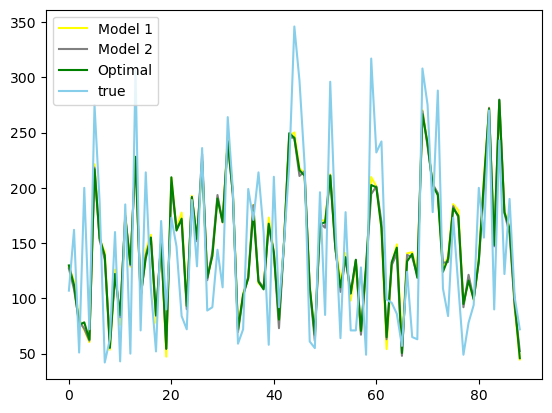

In [174]:
plt.plot(np.array(fit_train1.predict(test_x1)),label = "Model 1", color = "yellow")
#plt.plot(np.array(fit_train2.predict(test_x2)),label = "pred_1")
#plt.plot(np.array(fit_train3.predict(test_x3)),label = "pred_2")
#plt.plot(np.array(fit_train4.predict(test_x4)),label = "pred_3")
#plt.plot(np.array(fit_train5.predict(test_x5)),label = "pred_4")
#plt.plot(np.array(fit_train6.predict(test_x6)),label = "pred_5")
#plt.plot(np.array(fit_train7.predict(test_x7)),label = "pred_6")
#plt.plot(np.array(fit_train8.predict(test_x8)),label = "pred_7")
#plt.plot(np.array(fit_train9.predict(test_x9)),label = "pred_8")
#plt.plot(np.array(fit_train10.predict(test_x10)),label = "pred_9")
plt.plot(np.array(fit_train13.predict(test_x13)),label = "Model 2", color = "grey")
plt.plot(np.array(fit_train11.predict(test_x11)),label = "Optimal", color = "green")
#plt.plot(np.array(fit_train12.predict(test_x12)),label = "pred_11")

plt.plot(np.array(test_y1), label = "true", color = "skyblue")
plt.legend()
plt.show()

#### 4-3) 각 모델에 대해서 MSE와 R-Squred 값을 출력해보고, 어떤 변수를 선택하는 것이 최적인지 판단하여라.

In [164]:
from sklearn.metrics import r2_score,mean_squared_error

mse1 = mean_squared_error(y_true = test_y1, y_pred = fit_train1.predict(test_x1))
mse2 = mean_squared_error(y_true = test_y2, y_pred = fit_train2.predict(test_x2))
mse3 = mean_squared_error(y_true = test_y3, y_pred = fit_train3.predict(test_x3))
mse4 = mean_squared_error(y_true = test_y4, y_pred = fit_train4.predict(test_x4))
mse5 = mean_squared_error(y_true = test_y5, y_pred = fit_train5.predict(test_x5))
mse6 = mean_squared_error(y_true = test_y6, y_pred = fit_train6.predict(test_x6))
mse7 = mean_squared_error(y_true = test_y7, y_pred = fit_train7.predict(test_x7))
mse8 = mean_squared_error(y_true = test_y8, y_pred = fit_train8.predict(test_x8))
mse9 = mean_squared_error(y_true = test_y9, y_pred = fit_train9.predict(test_x9))
mse10 = mean_squared_error(y_true = test_y10, y_pred = fit_train10.predict(test_x10))
mse11 = mean_squared_error(y_true = test_y11, y_pred = fit_train11.predict(test_x11))
mse12 = mean_squared_error(y_true = test_y12, y_pred = fit_train12.predict(test_x12))
mse13 = mean_squared_error(y_true = test_y13, y_pred = fit_train13.predict(test_x13))

r2_score_1 = r2_score(y_true = test_y1, y_pred = fit_train1.predict(test_x1))
r2_score_2 = r2_score(y_true = test_y2, y_pred = fit_train2.predict(test_x2))
r2_score_3 = r2_score(y_true = test_y3, y_pred = fit_train3.predict(test_x3))
r2_score_4 = r2_score(y_true = test_y4, y_pred = fit_train4.predict(test_x4))
r2_score_5 = r2_score(y_true = test_y5, y_pred = fit_train5.predict(test_x5))
r2_score_6 = r2_score(y_true = test_y6, y_pred = fit_train6.predict(test_x6))
r2_score_7 = r2_score(y_true = test_y7, y_pred = fit_train7.predict(test_x7))
r2_score_8 = r2_score(y_true = test_y8, y_pred = fit_train8.predict(test_x8))
r2_score_9 = r2_score(y_true = test_y9, y_pred = fit_train9.predict(test_x9))
r2_score_10 = r2_score(y_true = test_y10, y_pred = fit_train10.predict(test_x10))
r2_score_11 = r2_score(y_true = test_y11, y_pred = fit_train11.predict(test_x11))
r2_score_12 = r2_score(y_true = test_y12, y_pred = fit_train12.predict(test_x12))
r2_score_13 = r2_score(y_true = test_y13, y_pred = fit_train13.predict(test_x13))

print("\n model 1 (Full)")
print("MSE : ",mse1)
print("R Square score : ",r2_score_1)

print("\n model 2 (age 제거)")
print("MSE : ",mse2)
print("R Square score : ",r2_score_2)

print("\n model 3 (s3 제거)")
print("MSE : ",mse3)
print("R Square score : ",r2_score_3)

print("\n model 4 (age, s3 제거)")
print("MSE : ",mse4)
print("R Square score : ",r2_score_4)

print("\n model 5 (age, s3, s4)")
print("MSE : ",mse5)
print("R Square score : ",r2_score_5)

print("\n model 6 (age, s3, s4, s6 제거)")
print("MSE : ",mse6)
print("R Square score : ",r2_score_6)

print("\n model 7 (s1, s2 제거)")
print("MSE : ",mse7)
print("R Square score : ",r2_score_7)

print("\n model 8 (age, s2 제거)")
print("MSE : ",mse8)
print("R Square score : ",r2_score_8)

print("\n model 9 (age, s2, s3 제거)")
print("MSE : ",mse9)
print("R Square score : ",r2_score_9)

print("\n model 10 (age, s2, s3, s6 제거)")
print("MSE : ",mse10)
print("R Square score : ",r2_score_10)

print("\n model 11 (s1 제거)")
print("MSE : ",mse11)
print("R Square score : ",r2_score_11)

print("\n model 12 (s2 제거)")
print("MSE : ",mse12)
print("R Square score : ",r2_score_12)

print("\n model 13 (age, s1, s4, s6 제거)")
print("MSE : ",mse13)
print("R Square score : ",r2_score_13)


 model 1 (Full)
MSE :  2772.9139204201674
R Square score :  0.5587206234101267

 model 2 (age 제거)
MSE :  2777.652617934989
R Square score :  0.5579665107527559

 model 3 (s3 제거)
MSE :  2777.8825683862237
R Square score :  0.5579299166158012

 model 4 (age, s3 제거)
MSE :  2782.282701903137
R Square score :  0.5572296827711958

 model 5 (age, s3, s4)
MSE :  2782.4870122120315
R Square score :  0.5571971689866618

 model 6 (age, s3, s4, s6 제거)
MSE :  2759.2424728260253
R Square score :  0.5608962870060994

 model 7 (s1, s2 제거)
MSE :  2807.0615152399996
R Square score :  0.5532864015819006

 model 8 (age, s2 제거)
MSE :  2769.134646401794
R Square score :  0.5593220541543373

 model 9 (age, s2, s3 제거)
MSE :  2761.054383883213
R Square score :  0.5606079408818783

 model 10 (age, s2, s3, s6 제거)
MSE :  2702.732212396418
R Square score :  0.5698892861430974

 model 11 (s1 제거)
MSE :  2765.8790914424435
R Square score :  0.5598401406525646

 model 12 (s2 제거)
MSE :  2748.7606978934955
R Square sco

In [ ]:
# model 10 optimal